In [2]:
%matplotlib inline
import os
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Model.model import Model
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import TSNE

# Plot loss

In [3]:
record_aae = np.load('./Save/record_aae.npy')
record_gen = np.load('./Save/record_gen.npy')
record_disc = np.load('./Save/record_disc.npy')

### Reconstruction loss

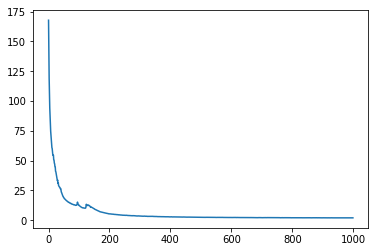

In [4]:
plt.plot(record_aae)

### Generator loss

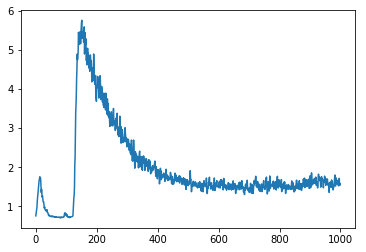

In [5]:
plt.plot(record_gen)

### Discrminator loss

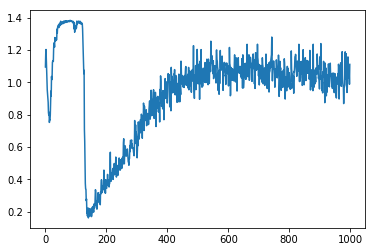

In [6]:
plt.plot(record_disc)

# Use test data to test model 

In [7]:
batch_size = 5000
z_dim = 50

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True) 
data = mnist.train.images[0:batch_size]
labels = mnist.train.labels[0:batch_size]
input_dim = np.shape(data)[1]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
model = Model(input_dim, z_dim)
model.set_model()
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, "./Save/model.ckpt")
print("Model restored")

Model restored


In [9]:
z = model.encoding(sess, data)
indexes = np.argmax(np.asarray(labels), axis = 1)
unique, counts = np.unique(indexes, return_counts=True)
print np.asarray((unique, counts)).T

[[  0 522]
 [  1 564]
 [  2 503]
 [  3 539]
 [  4 445]
 [  5 429]
 [  6 513]
 [  7 520]
 [  8 482]
 [  9 483]]


In [10]:
if z_dim > 2:
    tsne = TSNE(n_components = 2, random_state = 0)
    t_z = tsne.fit_transform(z)
else:
    t_z = z

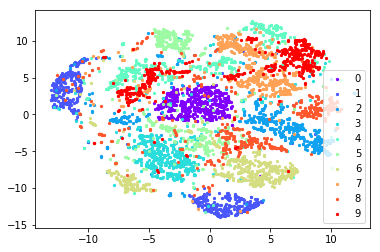

In [11]:
colors = cm.rainbow(np.linspace(0, 1, 10))
scatter = []
index = xrange(10)
for i in range(10):
    tmp = np.where(indexes == i)
    scatter.append(plt.scatter(t_z[tmp, 0], t_z[tmp, 1], c = colors[i] ,s = 5))

plt.legend(scatter, index)
plt.savefig('Result/mnist_test.png')
plt.show()


In [12]:
data = model.gen_data(sess, z)

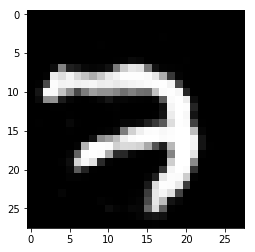

In [13]:
tmp = np.reshape(data[0], (28, 28))
plt.imshow(tmp, cmap='gray')

In [14]:
sess.close()